This notebook generates the figures for Chapter 3: Preprocessing from Poldrack, Mumford, and Nichols' _Handbook of fMRI Data Analysis (2nd Edition)_

In [21]:
import os,sys
from wand.image import Image as WImage
import numpy
import scipy.stats
import matplotlib.pyplot as plt
import nilearn.plotting
%matplotlib inline
import nibabel

# set up rpy2 so we can use R magic
%load_ext rpy2.ipython

datadir=os.getenv('FMRIBOOKDATA')
if not datadir:
    raise Exception('You need to set the environment variable FMRIBOOKDATA')
else:
    print 'using base dir:',datadir
sys.path.append('../../utils')

from get_data import get_data
data=get_data()

orig_figuredir='https://web.stanford.edu/group/poldracklab/fmri-handbook-2e-data/figures-1e/'

figuredir=os.path.join(datadir,'../../figures')
if not os.path.exists(figuredir):
    os.mkdir(figuredir)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
using base dir: /Users/poldrack/data_unsynced/fmri-handbook-2e-data


__Figure 3.1__: Use original manually generated version

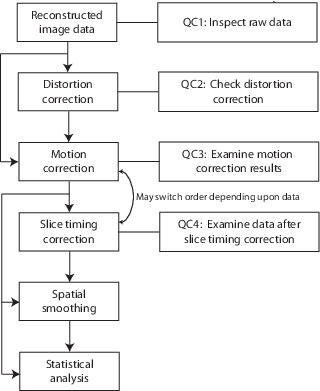

In [12]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_1.pdf'))

__Figure 3.2__: Use original manually generated version

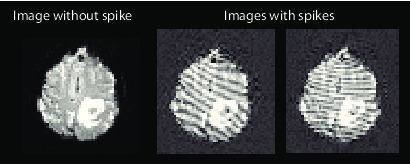

In [14]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_2.pdf'))

__Figure 3.3__: Use original manually generated version

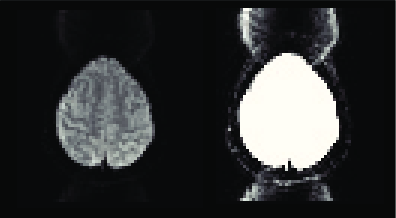

In [15]:
WImage(filename=os.path.join(orig_figuredir,'Figure_3_3.pdf'))

__Figure 3.4__: Example of ICA component map and timecourse

In [ ]:
# use image from melodic since it looks better than the nilearn stats maps
import matplotlib
melodic_mix=numpy.loadtxt(os.path.join(data['func_ica'],'melodic_mix'))
fig=plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=3)
component_img=matplotlib.image.imread(os.path.join(data['func_ica'],'report/IC_11_thresh.png'))
cropped_img=numpy.squeeze(component_img[1175:1750,:750,:])
print cropped_img.shape
print component_img.shape
plt.imshow(cropped_img)
plt.xticks([])
plt.yticks([])

ax1 = plt.subplot2grid((4,1), (3,0))
plt.plot(melodic_mix[:,10])
plt.xlabel('Timepoints',fontsize=18)
plt.ylabel('Component response',fontsize=14)
plt.savefig(os.path.join(figuredir,'Figure_3_4.svg'),format='svg',dpi=1200)